In [1]:
import pandas as pd
df = pd.read_csv('~/Documents/ELEN_520/ComputerRepair.csv')
df.head()

,i,y,x
0,1,23,1
1,2,29,2
2,3,49,3
3,4,64,4
4,5,74,4


In [2]:
import statsmodels.formula.api as stats
lm_fit = stats.ols(formula='y~x', data=df).fit()
lm_fit.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           8.92e-13
Time:                        12:40:32   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.239      -3.148      11.472
x             15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.y, df.x)
y_pred = lm_fit.predict(df.x)
plt.plot(y_pred, df.x)

In [4]:
import numpy as np
#standard error of estimated slope
beta1= 15.51
numObservations = 14
sigma_hat_square = np.sum(np.power(df.y-y_pred,2))/(numObservations-2)
sigma_hat = np.sqrt(sigma_hat_square)
se_beta1 = sigma_hat/np.sqrt(np.sum(np.power(df.x-np.mean(df.x), 2)))
t1= (beta1-12)/(se_beta1)
# t statistic for testing beta1=12 against beta1 not equal to 12
t1

6.950752355449083

In [5]:
y_pred = lm_fit.predict(df.x)
y_pred

0      19.670426
1      35.179198
2      50.687970
3      66.196742
4      66.196742
5      81.705514
6      97.214286
7      97.214286
8     112.723058
9     128.231830
10    143.740602
11    143.740602
12    159.249373
13    159.249373
dtype: float64

In [6]:
xi = 4
numObservations = 14
a = np.power((xi - np.mean(df.x)), 2)
b = np.sum(np.power((df.x - np.mean(df.x)), 2))
se_ypred_hat = np.sqrt(1/numObservations + a/b)* sigma_hat
se_ypred_hat

1.7596882890934302

In [7]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='y~x', data=df).fit()
lm.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           8.92e-13
Time:                        12:40:34   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.239      -3.148      11.472
x             15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

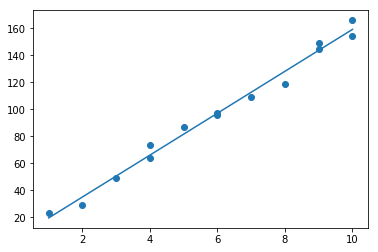

In [8]:
import matplotlib.pyplot as mp
mp.scatter(df.x, df.y)
y_hat = lm.predict(df.x)
mp.plot(df.x, y_hat)

In [9]:
import numpy as np
numObservations = 14
std_dev_hat = np.sum(np.power(df.y-y_hat, 2))/(numObservations-2)

In [22]:
beta1  = 15.5
a = np.sum(np.power(df.x-np.mean(df.x),2))
std_err_beta1_hat = std_dev_hat/np.sqrt(a)
std_err_beta1_hat
t1 = (beta1 - 12)/std_err_beta1_hat
t1


1.2854790905093425